In [1]:
import tensorflow as tf

In [2]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 600 files belonging to 3 classes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
scalled_data = data.map(lambda x,y: (x/255,y))

In [5]:
scalled_itterator=scalled_data.as_numpy_iterator()

In [6]:
train_size=int(len(scalled_data)*.7)
val_size=int(len(scalled_data)*.1)+1
text_size=int(len(scalled_data)*.2)+1

In [7]:
train_size,val_size,text_size

(13, 2, 4)

In [8]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
text=data.skip(train_size+val_size).take(text_size)

In [9]:
len(train),len(val),len(text)

(13, 2, 4)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [11]:
model = Sequential()

In [12]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [14]:
model.compile('adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [15]:
logdir='logs'

In [16]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
hist=model.fit(train,epochs=8,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/8
13/13 [==============================] - 26s 2s/step - loss: 207.1673 - accuracy: 0.6154 - val_loss: 0.4622 - val_accuracy: 0.9531
Epoch 2/8
13/13 [==============================] - 26s 2s/step - loss: 0.1304 - accuracy: 0.9904 - val_loss: 1.5999e-06 - val_accuracy: 1.0000
Epoch 3/8
13/13 [==============================] - 23s 2s/step - loss: 0.1579 - accuracy: 0.9832 - val_loss: 0.2207 - val_accuracy: 0.9844
Epoch 4/8
13/13 [==============================] - 22s 2s/step - loss: 0.0190 - accuracy: 0.9952 - val_loss: 2.8626e-05 - val_accuracy: 1.0000
Epoch 5/8
13/13 [==============================] - 22s 2s/step - loss: 1.9178e-04 - accuracy: 1.0000 - val_loss: 6.1505e-05 - val_accuracy: 1.0000
Epoch 6/8
13/13 [==============================] - 22s 2s/step - loss: 6.4104e-06 - accuracy: 1.0000 - val_loss: 2.0489e-08 - val_accuracy: 1.0000
Epoch 7/8
13/13 [==============================] - 22s 2s/step - loss: 4.5492e-06 - accuracy: 1.0000 - val_loss: 1.0058e-07 - val_accuracy: 

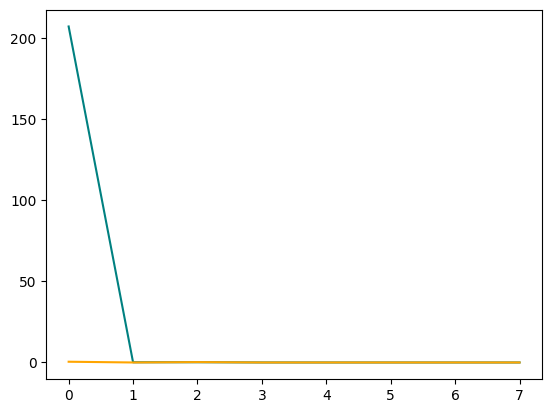

In [18]:
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
plt.show()

In [20]:
hist.history

{'loss': [207.16725158691406,
  0.13039220869541168,
  0.1579018235206604,
  0.018972573801875114,
  0.00019178184447810054,
  6.4104096964001656e-06,
  4.549232926365221e-06,
  1.1363617886672728e-05],
 'accuracy': [0.6153846383094788,
  0.9903846383094788,
  0.9831730723381042,
  0.995192289352417,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4621690511703491,
  1.5999345350792282e-06,
  0.22074559330940247,
  2.862607652787119e-05,
  6.150506669655442e-05,
  2.048908598339949e-08,
  1.0058251120881323e-07,
  9.164535185846034e-06],
 'val_accuracy': [0.953125, 1.0, 0.984375, 1.0, 1.0, 1.0, 1.0, 1.0]}

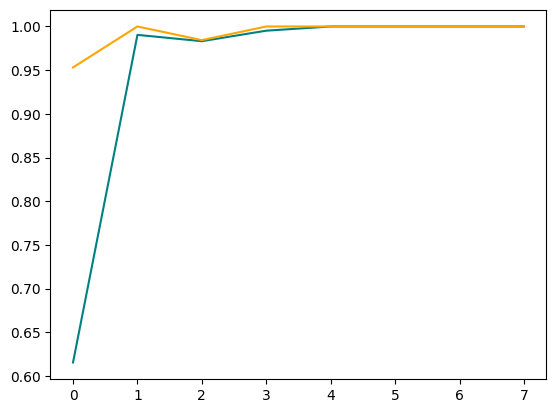

In [21]:
plt.plot(hist.history['accuracy'],color='teal',label='Loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')

In [49]:
dataset_itterator=text.as_numpy_iterator()
batch=dataset_itterator.next()
y_pred = model.predict(batch[0])

1/1 [==============================] - 1s 745ms/step


In [96]:
y_pred[6]

array([9.9999976e-01, 2.0551471e-07, 2.3228765e-10], dtype=float32)

In [73]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy,Accuracy,Recall,Precision

In [74]:
pre=Precision()
re=Recall()
sca=SparseCategoricalAccuracy()
    

In [113]:
from sklearn.metrics import precision_score
import numpy as np

In [120]:
for batch in text.as_numpy_iterator():
    x,y=batch
    predicted_probabilities=model.predict(x)
    predicted_labels = np.argmax(predicted_probabilities, axis=1) 
    print(y)
    print(predicted_labels)
    precision = precision_score(y, predicted_labels, average=None)
    print("Precision for each class:", precision)


1/1 [==============================] - 0s 499ms/step
[0 0 0 1 0 0 2 2 0 0 2 0 1 2 0 1 1 0 1 2 0 1 1 2 0 2 2 2 1 0 2 1]
[0 0 0 1 0 0 2 2 0 0 2 0 1 2 0 1 1 0 1 2 0 1 1 2 0 2 2 2 1 0 2 1]
Precision for each class: [1. 1. 1.]
1/1 [==============================] - 0s 474ms/step
[1 1 0 1 2 1 1 1 1 2 1 2 0 1 2 0 0 0 1 0 2 0 1 1 2 0 2 0 2 1 0 0]
[1 1 0 1 2 1 1 1 1 2 1 2 0 1 2 0 0 0 1 0 2 0 1 1 2 0 2 0 2 1 0 0]
Precision for each class: [1. 1. 1.]
1/1 [==============================] - 0s 466ms/step
[0 2 0 0 1 0 1 2 0 1 0 0 2 2 2 1 2 2 2 0 1 1 1 2 1 0 1 1 1 0 2 2]
[0 2 0 0 1 0 1 2 0 1 0 0 2 2 2 1 2 2 2 0 1 1 1 2 1 0 1 1 1 0 2 2]
Precision for each class: [1. 1. 1.]
1/1 [==============================] - 0s 383ms/step
[1 0 1 0 2 2 2 1 2 2 2 2 2 2 1 2 0 2 1 1 0 2 0 1]
[1 0 1 0 2 2 2 1 2 2 2 2 2 2 1 2 0 2 1 1 0 2 0 1]
Precision for each class: [1. 1. 1.]


In [121]:
for batch in text.as_numpy_iterator():
    x,y=batch
    predicted_probabilities=model.predict(x)
    predicted_labels = np.argmax(predicted_probabilities, axis=1) 
    print(y)
    print(predicted_labels)
    precision = precision_score(y, predicted_labels, average=None)
    recall = recall_score(y, predicted_labels, average=None)
    f1 = f1_score(y, predicted_labels, average=None)

    print("Precision for each class:", precision)
    print("Recall for each class:", recall)
    print("F1 score for each class:", f1)

1/1 [==============================] - 1s 544ms/step
[1 0 0 2 2 0 0 1 2 2 1 2 0 0 0 1 2 2 1 0 2 1 0 1 1 1 0 2 2 0 0 2]
[1 0 0 2 2 0 0 1 2 2 1 2 0 0 0 1 2 2 1 0 2 1 0 1 1 1 0 2 2 0 0 2]
Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
F1 score for each class: [1. 1. 1.]
1/1 [==============================] - 1s 585ms/step
[1 0 0 0 2 2 2 1 2 2 2 2 1 0 2 1 2 1 2 2 1 0 2 0 1 0 0 0 0 1 0 2]
[1 0 0 0 2 2 2 1 2 2 2 2 1 0 2 1 2 1 2 2 1 0 2 0 1 0 0 0 0 1 0 2]
Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
F1 score for each class: [1. 1. 1.]
1/1 [==============================] - 1s 596ms/step
[0 2 0 0 2 0 1 0 0 0 1 1 0 1 1 0 1 0 2 1 1 2 1 0 0 1 2 0 1 1 2 2]
[0 2 0 0 2 0 1 0 0 0 1 1 0 1 1 0 1 0 2 1 1 2 1 0 0 1 2 0 1 1 2 2]
Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
F1 score for each class: [1. 1. 1.]
1/1 [==============================] - 0s 404ms/step
[1 2 1 1 0 1 2 2 2 1 1 0 2 2 0 2 2 2 1 0 0 1 2 0]
[1 2 1 1 0 1 2 2 2 1 

In [124]:
model.save("hand_gesture_train_model.h5")